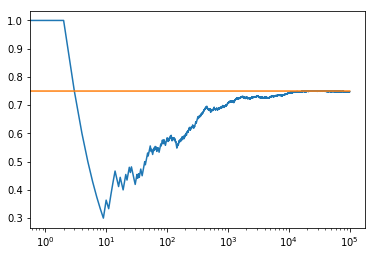

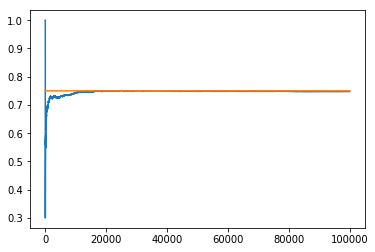

0.2441860465116279
0.5553470919324578
0.7491648555099397
total reward earned: 74769.0
overall win rate: 0.74769
num times selected each bandit: [86.0, 533.0, 99384.0]


In [2]:
import numpy as np
import matplotlib.pyplot as plt


NUM_TRIALS = 100000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]


class Bandit:
    def __init__(self, p):
        # p: the win rate
        self.p = p
        self.p_estimate = 0.
        self.N = 0. # num samples collected so far

    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1.
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N


def ucb(mean, n, nj):
    return mean + np.sqrt(2*np.log(n) / nj)


def run_experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    rewards = np.empty(NUM_TRIALS)
    total_plays = 0

  # initialization: play each bandit once
    for j in range(len(bandits)):
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)
  
    for i in range(NUM_TRIALS):
        j = np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)

        # for the plot
        rewards[i] = x
    cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

  # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.xscale('log')
    plt.show()

  # plot moving average ctr linear
    plt.plot(cumulative_average)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()

    for b in bandits:
        print(b.p_estimate)

    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num times selected each bandit:", [b.N for b in bandits])

    return cumulative_average

if __name__ == '__main__':
    run_experiment()